In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
import time
import webbrowser
import folium
import googlemaps
import mysql.connector

/tmp/ipykernel_16142/495930524.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### 1. 2014년 ~ 2023년 동안 소비자 물가 총지수 그래프

In [17]:
chae = mysql.connector.connect(     
         host = "엔드포인트",     
          port = 3306,     
          user = "chae",     
          password = "비밀번호",     
          database = "AutoFarming" 
)

# 테이블 불러오기
chae_cursor = chae.cursor()
chae_cursor.execute('select * from Total_CPI')

# 쿼리 결과를 데이터프레임으로 변환
df_tot_cpi = pd.DataFrame(chae_cursor.fetchall(), columns=chae_cursor.column_names)
df_tot_cpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        10 non-null     object 
 1   Nationwide  10 non-null     float64
 2   Seoul       10 non-null     float64
 3   Busan       10 non-null     float64
 4   Daegu       10 non-null     float64
 5   Incheon     10 non-null     float64
 6   Gwangju     10 non-null     float64
 7   Daejeon     10 non-null     float64
 8   Ulsan       10 non-null     float64
 9   Sejong      10 non-null     float64
 10  Gyeonggi    10 non-null     float64
 11  Gangwon     10 non-null     float64
 12  Chungbuk    10 non-null     float64
 13  Chungnam    10 non-null     float64
 14  Jeonbuk     10 non-null     float64
 15  Jeonnam     10 non-null     float64
 16  Gyeongbuk   10 non-null     float64
 17  Gyeongnam   10 non-null     float64
 18  Jeju        10 non-null     float64
dtypes: float64(18), object(1)
memory

In [25]:
df_tot_cpi.columns

Index(['Year', 'Nationwide', 'Seoul', 'Busan', 'Daegu', 'Incheon', 'Gwangju',
       'Daejeon', 'Ulsan', 'Sejong', 'Gyeonggi', 'Gangwon', 'Chungbuk',
       'Chungnam', 'Jeonbuk', 'Jeonnam', 'Gyeongbuk', 'Gyeongnam', 'Jeju'],
      dtype='object')

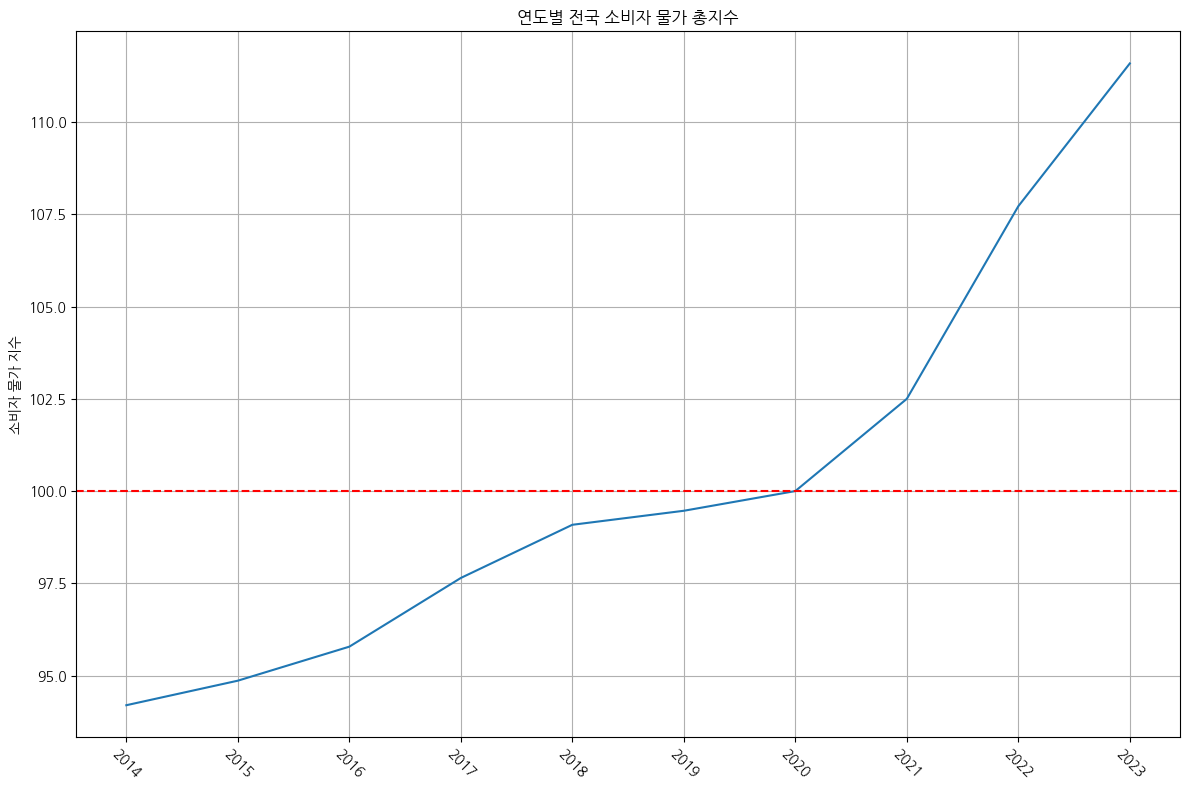

In [16]:
# 증감률 시각화
plt.figure(figsize=(12, 8))

# 모든 연도에 대한 증감률을 선 그래프로 표현
plt.plot(df_tot_cpi['Year'], df_tot_cpi['Nationwide'], linestyle='-')
# y값이 100인 x축에 대해 수평인 선 추가
plt.axhline(y=100, color='r', linestyle='--')

plt.title('연도별 전국 소비자 물가 총지수')
plt.xlabel('')
plt.ylabel('소비자 물가 지수')
plt.xticks(rotation=-45)
# x축 간격을 1로 설정
plt.xticks(df_tot_cpi['Year'])
plt.grid(True)
plt.tight_layout()
plt.show()

### 2. 2014년 ~ 2023년 동안 과실 물가 그래프

In [36]:
chae = mysql.connector.connect(     
         host = "엔드포인트",     
          port = 3306,     
          user = "chae",     
          password = "비밀번호",     
          database = "AutoFarming" 
)

# 테이블 불러오기
chae_cursor = chae.cursor()
chae_cursor.execute('select * from All_Fruit_CPI')

# 쿼리 결과를 데이터프레임으로 변환
df_fruit_cpi = pd.DataFrame(chae_cursor.fetchall(), columns=chae_cursor.column_names)
df_fruit_cpi.info()

chae.close()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        10 non-null     object 
 1   Nationwide  10 non-null     float64
 2   Seoul       10 non-null     float64
 3   Busan       10 non-null     float64
 4   Daegu       10 non-null     float64
 5   Incheon     10 non-null     float64
 6   Gwangju     10 non-null     float64
 7   Daejeon     10 non-null     float64
 8   Ulsan       10 non-null     float64
 9   Sejong      10 non-null     float64
 10  Gyeonggi    10 non-null     float64
 11  Gangwon     10 non-null     float64
 12  Chungbuk    10 non-null     float64
 13  Chungnam    10 non-null     float64
 14  Jeonbuk     10 non-null     float64
 15  Jeonnam     10 non-null     float64
 16  Gyeongbuk   10 non-null     float64
 17  Gyeongnam   10 non-null     float64
 18  Jeju        10 non-null     float64
dtypes: float64(18), object(1)
memory

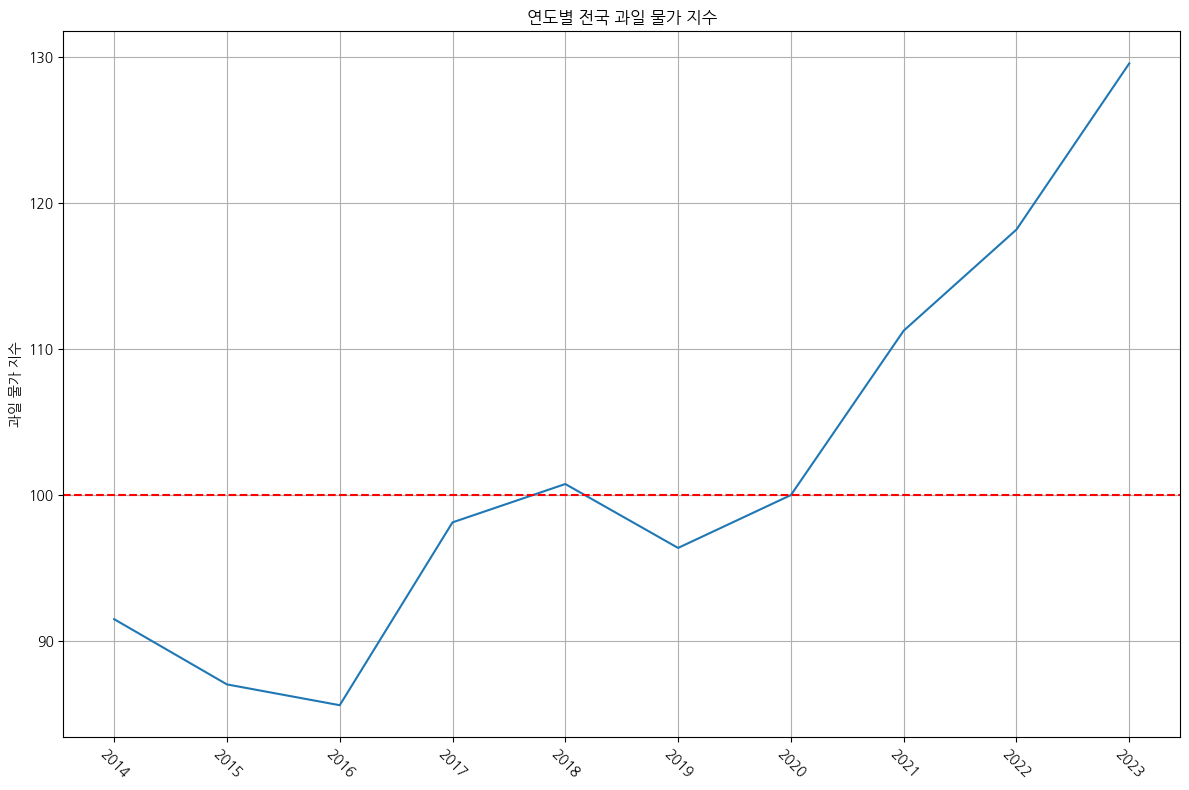

In [37]:
# 증감률 시각화
plt.figure(figsize=(12, 8))

# 모든 연도에 대한 증감률을 선 그래프로 표현
plt.plot(df_fruit_cpi['Year'], df_fruit_cpi['Nationwide'], linestyle='-')
# y값이 100인 x축에 대해 수평인 선 추가
plt.axhline(y=100, color='r', linestyle='--')

plt.title('연도별 전국 과일 물가 지수')
plt.xlabel('')
plt.ylabel('과일 물가 지수')
plt.xticks(rotation=-45)
# x축 간격을 1로 설정
plt.xticks(df_fruit_cpi['Year'])
plt.grid(True)
plt.tight_layout()
plt.show()

### 과일 가격 상승 관련 소비자 물가 비교

#### 채소 테이블 불러오기

In [18]:
chae = mysql.connector.connect(     
         host = "엔드포인트",     
          port = 3306,     
          user = "chae",     
          password = "비밀번호",     
          database = "AutoFarming" 
)

# 테이블 불러오기
chae_cursor = chae.cursor()
chae_cursor.execute('select * from Vegetable')


# 쿼리 결과를 데이터프레임으로 변환
df_veg = pd.DataFrame(chae_cursor.fetchall(), columns=chae_cursor.column_names)
df_veg.info()

In [21]:
def Eachyear_Hgst_Inc_Top5(Y, df):
    total_list = []
    for year in range(Y, 2023):
        top_5_items = df.sort_values(by=f'GR_from_{year}', ascending=False).head(5)['Name']
        top_5_items = list(top_5_items)

        for i in range(5):
            total_list.append(top_5_items[i])
    
    print(np.unique(total_list))

    # 각 요소의 갯수를 세어서 dictionary에 저장
    count_dict = {key: total_list.count(key) for key in np.unique(total_list)}
    
    print(count_dict)
    print(len(total_list))
    print(len(count_dict.keys()))
    print(len(np.unique(total_list)))
    
    return count_dict


In [22]:
count_dict = Eachyear_Hgst_Inc_Top5(2015, df_veg)

['감자' '고구마' '당근' '도라지' '마늘' '무' '배추' '브로콜리' '상추' '생강' '시금치' '양배추' '양파'
 '열무' '오이' '콩나물' '파' '풋고추' '호박']
{'감자': 3, '고구마': 1, '당근': 3, '도라지': 1, '마늘': 2, '무': 4, '배추': 3, '브로콜리': 1, '상추': 1, '생강': 3, '시금치': 3, '양배추': 3, '양파': 3, '열무': 2, '오이': 2, '콩나물': 1, '파': 2, '풋고추': 1, '호박': 1}
40
19
19


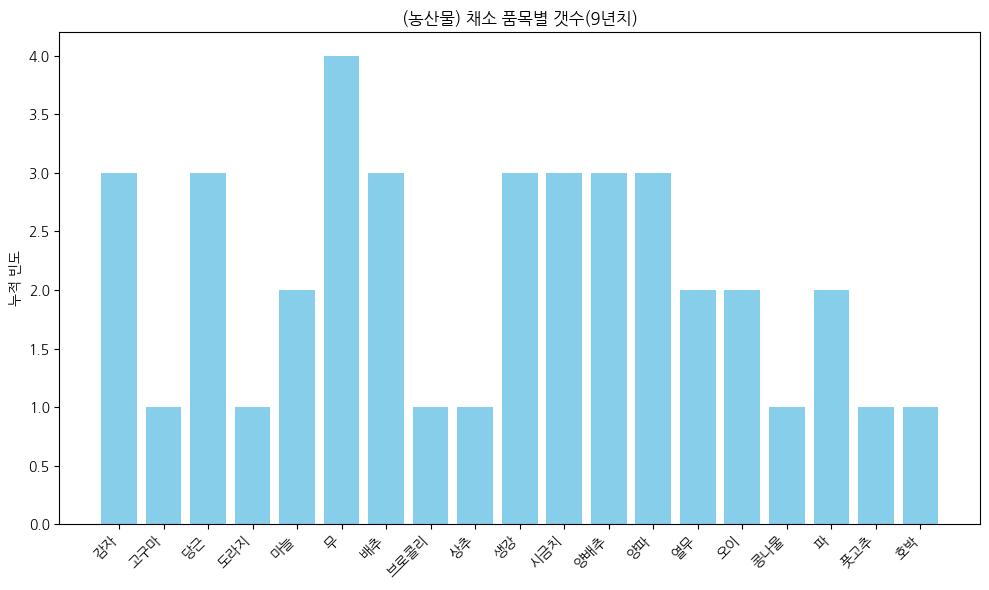

In [23]:
# x축과 y축 데이터 추출
x_values = list(count_dict.keys())
y_values = list(count_dict.values())

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(x_values, y_values, color='skyblue')
plt.xlabel('')
plt.ylabel('누적 빈도')
plt.title('(농산물) 채소 품목별 갯수(9년치)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### 과일 테이블 불러오기

In [23]:
chae_cursor.execute('select * from Fruit')
# 쿼리 결과를 데이터프레임으로 변환
df_fruit = pd.DataFrame(chae_cursor.fetchall(), columns=chae_cursor.column_names)
df_fruit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Region        19 non-null     object 
 1   Name          19 non-null     object 
 2   Year2014      19 non-null     float64
 3   Year2015      19 non-null     float64
 4   Year2016      19 non-null     float64
 5   Year2017      19 non-null     float64
 6   Year2018      19 non-null     float64
 7   Year2019      19 non-null     float64
 8   Year2020      19 non-null     float64
 9   Year2021      19 non-null     float64
 10  Year2022      19 non-null     float64
 11  Year2023      19 non-null     float64
 12  GR_from_2014  19 non-null     float64
 13  GR_from_2015  19 non-null     float64
 14  GR_from_2016  19 non-null     float64
 15  GR_from_2017  19 non-null     float64
 16  GR_from_2018  19 non-null     float64
 17  GR_from_2019  19 non-null     float64
 18  GR_from_2020  19 non-null     fl

#### 매년 증가률이 가장 높은 채소 품목 연도별 상위 5개 
#### 2014 ~ 2022년

#### 증가율 상위 5개 누적 빈도 수 

In [25]:
count_dict = Eachyear_Hgst_Inc_Top5(2015, df_veg)

['감자' '고구마' '당근' '도라지' '마늘' '무' '배추' '브로콜리' '상추' '생강' '시금치' '양배추' '양파'
 '열무' '오이' '콩나물' '파' '풋고추' '호박']
{'감자': 3, '고구마': 1, '당근': 3, '도라지': 1, '마늘': 2, '무': 4, '배추': 3, '브로콜리': 1, '상추': 1, '생강': 3, '시금치': 3, '양배추': 3, '양파': 3, '열무': 2, '오이': 2, '콩나물': 1, '파': 2, '풋고추': 1, '호박': 1}
40
19
19


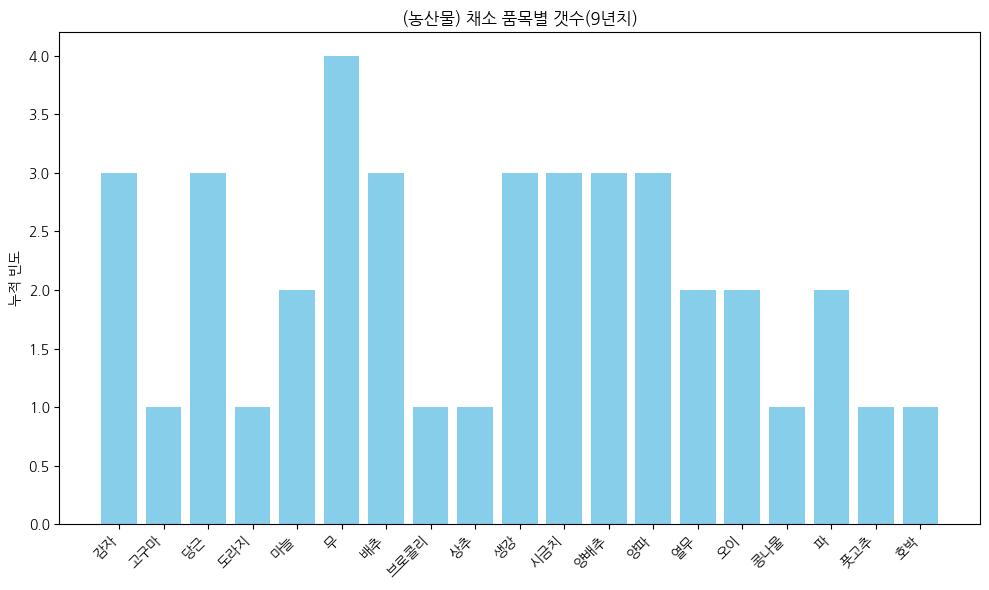

In [26]:
# x축과 y축 데이터 추출
x_values = list(count_dict.keys())
y_values = list(count_dict.values())

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(x_values, y_values, color='skyblue')
plt.xlabel('')
plt.ylabel('누적 빈도')
plt.title('(농산물) 채소 품목별 갯수(9년치)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### 2018 ~ 2022년

In [33]:
count_dict = Eachyear_Hgst_Inc_Top5(2018,df_veg)

['감자' '당근' '도라지' '마늘' '무' '배추' '브로콜리' '상추' '생강' '시금치' '양배추' '양파' '열무' '오이'
 '파' '풋고추' '호박']
{'감자': 1, '당근': 2, '도라지': 1, '마늘': 1, '무': 2, '배추': 2, '브로콜리': 1, '상추': 1, '생강': 2, '시금치': 1, '양배추': 1, '양파': 2, '열무': 2, '오이': 2, '파': 2, '풋고추': 1, '호박': 1}
25
17
17


#### 증가율 상위 5개 누적 빈도 수 

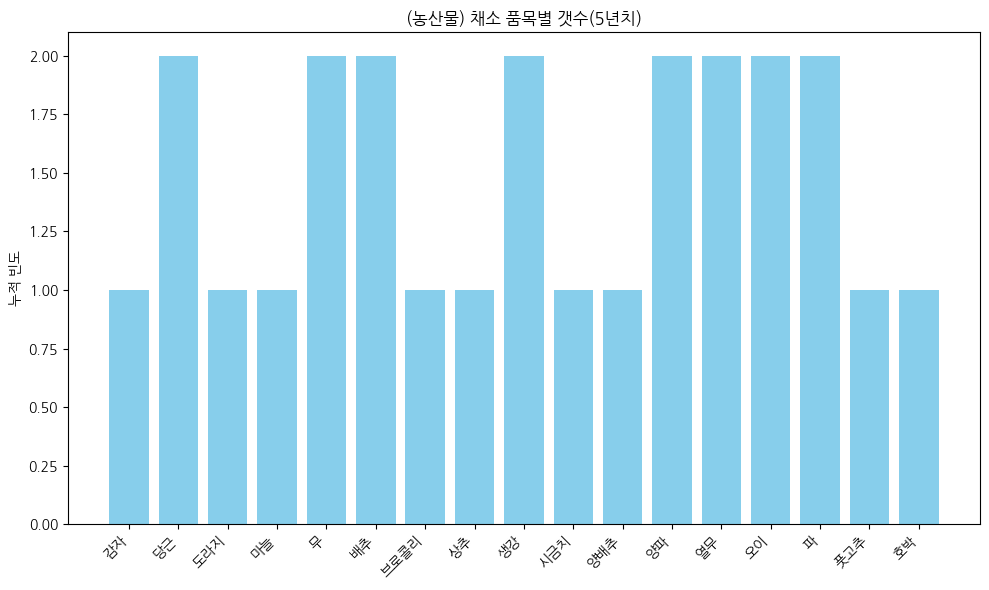

In [34]:
# x축과 y축 데이터 추출
x_values = list(count_dict.keys())
y_values = list(count_dict.values())

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(x_values, y_values, color='skyblue')
plt.xlabel('')
plt.ylabel('누적 빈도')
plt.title('(농산물) 채소 품목별 갯수(5년치)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### 매년 증가률이 가장 높은 채소 품목 연도별 상위 5개 
#### 2014 ~ 2022년

In [36]:
count_dict = Eachyear_Hgst_Inc_Top5(2015, df_fruit)

['감' '귤' '딸기' '바나나' '밤' '배' '복숭아' '블루베리' '사과' '수박' '아보카도' '오렌지' '참외' '체리'
 '키위' '파인애플' '포도']
{'감': 3, '귤': 4, '딸기': 3, '바나나': 2, '밤': 2, '배': 3, '복숭아': 2, '블루베리': 1, '사과': 4, '수박': 4, '아보카도': 1, '오렌지': 3, '참외': 1, '체리': 1, '키위': 1, '파인애플': 2, '포도': 3}
40
17
17


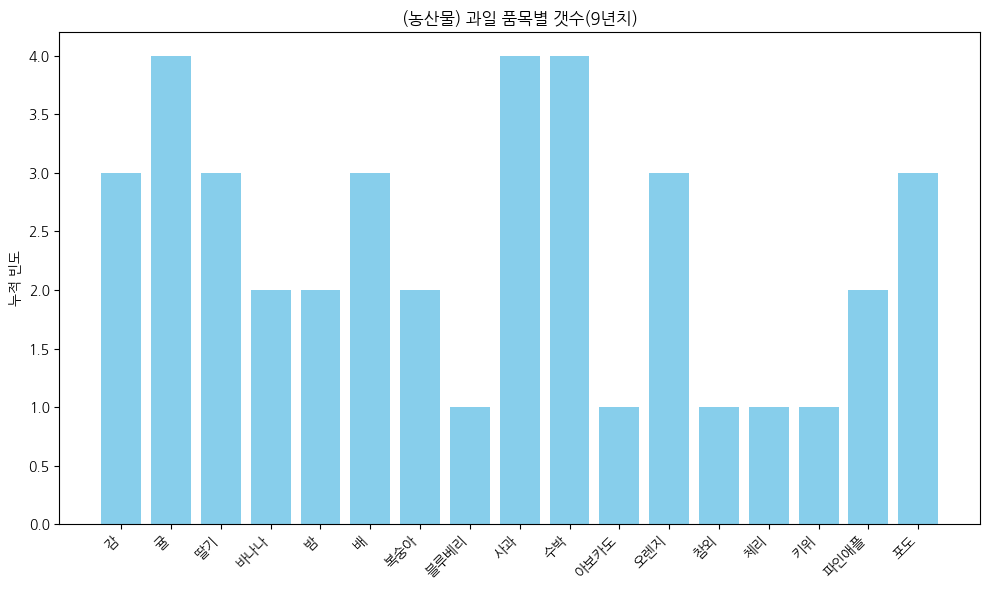

In [38]:
# x축과 y축 데이터 추출
x_values = list(count_dict.keys())
y_values = list(count_dict.values())

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(x_values, y_values, color='skyblue')
plt.xlabel('')
plt.ylabel('누적 빈도')
plt.title('(농산물) 과일 품목별 갯수(9년치)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### 2018~2022년

In [39]:
count_dict = Eachyear_Hgst_Inc_Top5(2019, df_fruit)

['감' '귤' '딸기' '밤' '배' '복숭아' '블루베리' '사과' '수박' '오렌지' '체리' '파인애플' '포도']
{'감': 1, '귤': 2, '딸기': 2, '밤': 1, '배': 1, '복숭아': 2, '블루베리': 1, '사과': 3, '수박': 1, '오렌지': 2, '체리': 1, '파인애플': 1, '포도': 2}
20
13
13


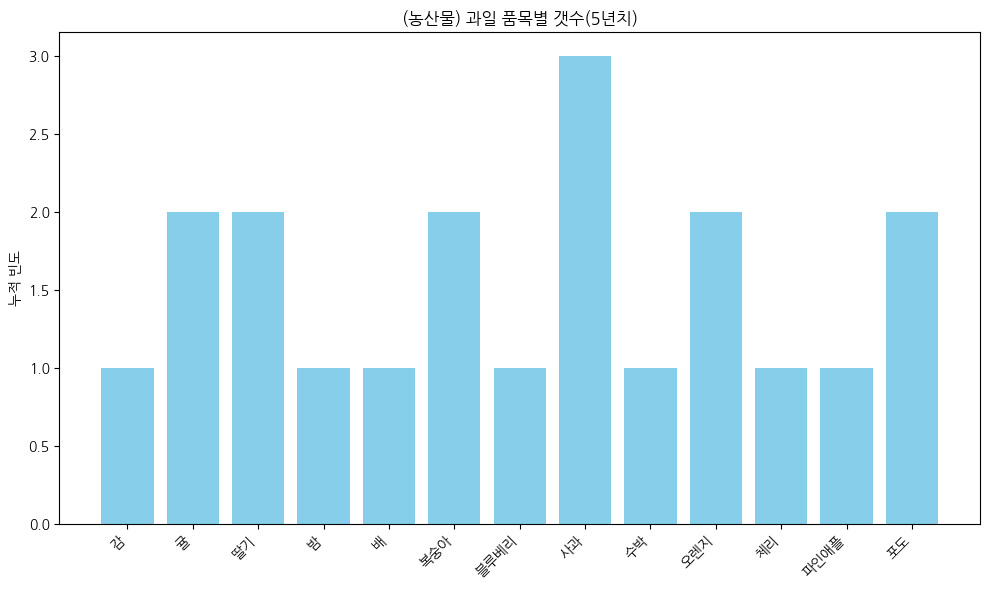

In [40]:
# x축과 y축 데이터 추출
x_values = list(count_dict.keys())
y_values = list(count_dict.values())

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(x_values, y_values, color='skyblue')
plt.xlabel('')
plt.ylabel('누적 빈도')
plt.title('(농산물) 과일 품목별 갯수(5년치)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [42]:
df = df_fruit.sort_values(by=f'GR_from_{2022}', ascending=False).head(5)
df['Name']

0       사과
6        귤
2      복숭아
17    파인애플
10      딸기
Name: Name, dtype: object

In [24]:
chae.close()

## 정리
### 채소
* 2015 ~ 2023년
    * 무, 시금치, 양배추, 양파

* 2019 ~ 2023년
    * 당근, 무, 배추, 생강, 양파, 열무, 오이

### 과일
* 2015 ~ 2023년
    * 귤, 딸기
* 2019 ~ 2023년
    * 귤, 딸기, 배, 복숭아, 사과, 오렌지, 오렌지, 체리, 파인애플, 포도